In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/data_2022_2023_sep13.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13256 entries, 0 to 13255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LastName     13248 non-null  object 
 1   FirstName    13238 non-null  object 
 2   Gender       13256 non-null  object 
 3   Country      13044 non-null  object 
 4   Date         13256 non-null  object 
 5   Competition  13256 non-null  object 
 6   Round        13256 non-null  object 
 7   Location     13256 non-null  object 
 8   Apparatus    13256 non-null  object 
 9   Rank         11717 non-null  float64
 10  D_Score      13099 non-null  float64
 11  E_Score      13024 non-null  float64
 12  Penalty      2932 non-null   float64
 13  Score        13091 non-null  float64
dtypes: float64(5), object(9)
memory usage: 1.4+ MB


In [5]:
df['Penalty'].fillna(0, inplace=True)

In [7]:
df["Gender"].value_counts()

Gender
m    8165
w    5091
Name: count, dtype: int64

In [8]:
df["Name"] = df["FirstName"] + ' ' + df['LastName']

In [9]:
df = df.drop(columns=["FirstName", "LastName"])

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_98704/2263964175.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13256 entries, 0 to 13255
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       13256 non-null  object        
 1   Country      13044 non-null  object        
 2   Date         10796 non-null  datetime64[ns]
 3   Competition  13256 non-null  object        
 4   Round        13256 non-null  object        
 5   Location     13256 non-null  object        
 6   Apparatus    13256 non-null  object        
 7   Rank         11717 non-null  float64       
 8   D_Score      13099 non-null  float64       
 9   E_Score      13024 non-null  float64       
 10  Penalty      13256 non-null  float64       
 11  Score        13091 non-null  float64       
 12  Name         13230 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.3+ MB


In [12]:
df1 = df.copy()

In [14]:
df1.dropna(inplace=True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8975 entries, 0 to 13247
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       8975 non-null   object        
 1   Country      8975 non-null   object        
 2   Date         8975 non-null   datetime64[ns]
 3   Competition  8975 non-null   object        
 4   Round        8975 non-null   object        
 5   Location     8975 non-null   object        
 6   Apparatus    8975 non-null   object        
 7   Rank         8975 non-null   float64       
 8   D_Score      8975 non-null   float64       
 9   E_Score      8975 non-null   float64       
 10  Penalty      8975 non-null   float64       
 11  Score        8975 non-null   float64       
 12  Name         8975 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 981.6+ KB


In [16]:
mens = df1[df1["Gender"] == 'm']

In [17]:
women = df1[df1["Gender"] == 'w']

In [19]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3555 entries, 102 to 13238
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       3555 non-null   object        
 1   Country      3555 non-null   object        
 2   Date         3555 non-null   datetime64[ns]
 3   Competition  3555 non-null   object        
 4   Round        3555 non-null   object        
 5   Location     3555 non-null   object        
 6   Apparatus    3555 non-null   object        
 7   Rank         3555 non-null   float64       
 8   D_Score      3555 non-null   float64       
 9   E_Score      3555 non-null   float64       
 10  Penalty      3555 non-null   float64       
 11  Score        3555 non-null   float64       
 12  Name         3555 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 388.8+ KB


In [18]:
women.nunique()

Gender           1
Country         72
Date            14
Competition     13
Round            4
Location        13
Apparatus        8
Rank           121
D_Score         54
E_Score        245
Penalty         12
Score          329
Name           528
dtype: int64

In [20]:
women["Apparatus"].value_counts()

Apparatus
BB      892
UB      820
FX      819
VT1     603
VT2     279
VT_1     62
VT_2     62
VT       18
Name: count, dtype: int64

In [21]:
# Define the values to be replaced and their replacements
replace_dict = {'VT1': 'VT', 'VT2': 'VT', 'VT_1': 'VT', 'VT_2': 'VT'}

# Use .replace() with the defined dictionary
women['Apparatus'] = women['Apparatus'].replace(replace_dict)

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_98704/2034038188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['Apparatus'] = women['Apparatus'].replace(replace_dict)


In [22]:
women["Apparatus"].value_counts()

Apparatus
VT    1024
BB     892
UB     820
FX     819
Name: count, dtype: int64

In [23]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3555 entries, 102 to 13238
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       3555 non-null   object        
 1   Country      3555 non-null   object        
 2   Date         3555 non-null   datetime64[ns]
 3   Competition  3555 non-null   object        
 4   Round        3555 non-null   object        
 5   Location     3555 non-null   object        
 6   Apparatus    3555 non-null   object        
 7   Rank         3555 non-null   float64       
 8   D_Score      3555 non-null   float64       
 9   E_Score      3555 non-null   float64       
 10  Penalty      3555 non-null   float64       
 11  Score        3555 non-null   float64       
 12  Name         3555 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 388.8+ KB


In [24]:
women["Location"].value_counts()

Location
Munich, Germany              624
Antalya, Turkey              619
Liverpool, England           458
Chengdu, China               295
San Salvador, El Salvador    261
Stuttgart, Germany           217
Baku, Azerbaijan             196
Cairo, Egypt                 193
Cottbus, Germany             179
Doha, Qatar                  147
Varna, Bulgaria              145
Tel Aviv, Israel             128
Osijek, Croatia.              93
Name: count, dtype: int64

In [25]:
women["Competition"].value_counts()

Competition
2022 Senior European Championships           624
2023 Senior European Championships           619
World Cup                                    536
2022 British Gymnastics Championships        308
2023 Central American and Caribbean Games    261
2023 FISU World University Games             224
EnBW DTB Pokal Team Challenge 2023           217
FIG Apparatus World Cup 2023                 179
2023 British Gymnastics Championships        150
2023 Varna World Challenge Cup Results       145
2023 Tel Aviv Challenge Cup                  128
2023 Osijek Challenge Cup                     93
2023 FISH World University Games              71
Name: count, dtype: int64

In [26]:
women["Round"].value_counts()

Round
qual         2736
final         480
AAfinal       243
TeamFinal      96
Name: count, dtype: int64

In [27]:
women = women.drop(columns=["Gender"])

In [28]:
women.columns

Index(['Country', 'Date', 'Competition', 'Round', 'Location', 'Apparatus',
       'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score', 'Name'],
      dtype='object')

In [29]:
women = women[[ 'Name','Country', 'Date', 'Competition', 'Round', 'Location', 'Apparatus',
       'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']]

In [30]:
women = women.drop(columns=["Date"])

In [31]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3555 entries, 102 to 13238
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         3555 non-null   object 
 1   Country      3555 non-null   object 
 2   Competition  3555 non-null   object 
 3   Round        3555 non-null   object 
 4   Location     3555 non-null   object 
 5   Apparatus    3555 non-null   object 
 6   Rank         3555 non-null   float64
 7   D_Score      3555 non-null   float64
 8   E_Score      3555 non-null   float64
 9   Penalty      3555 non-null   float64
 10  Score        3555 non-null   float64
dtypes: float64(5), object(6)
memory usage: 333.3+ KB


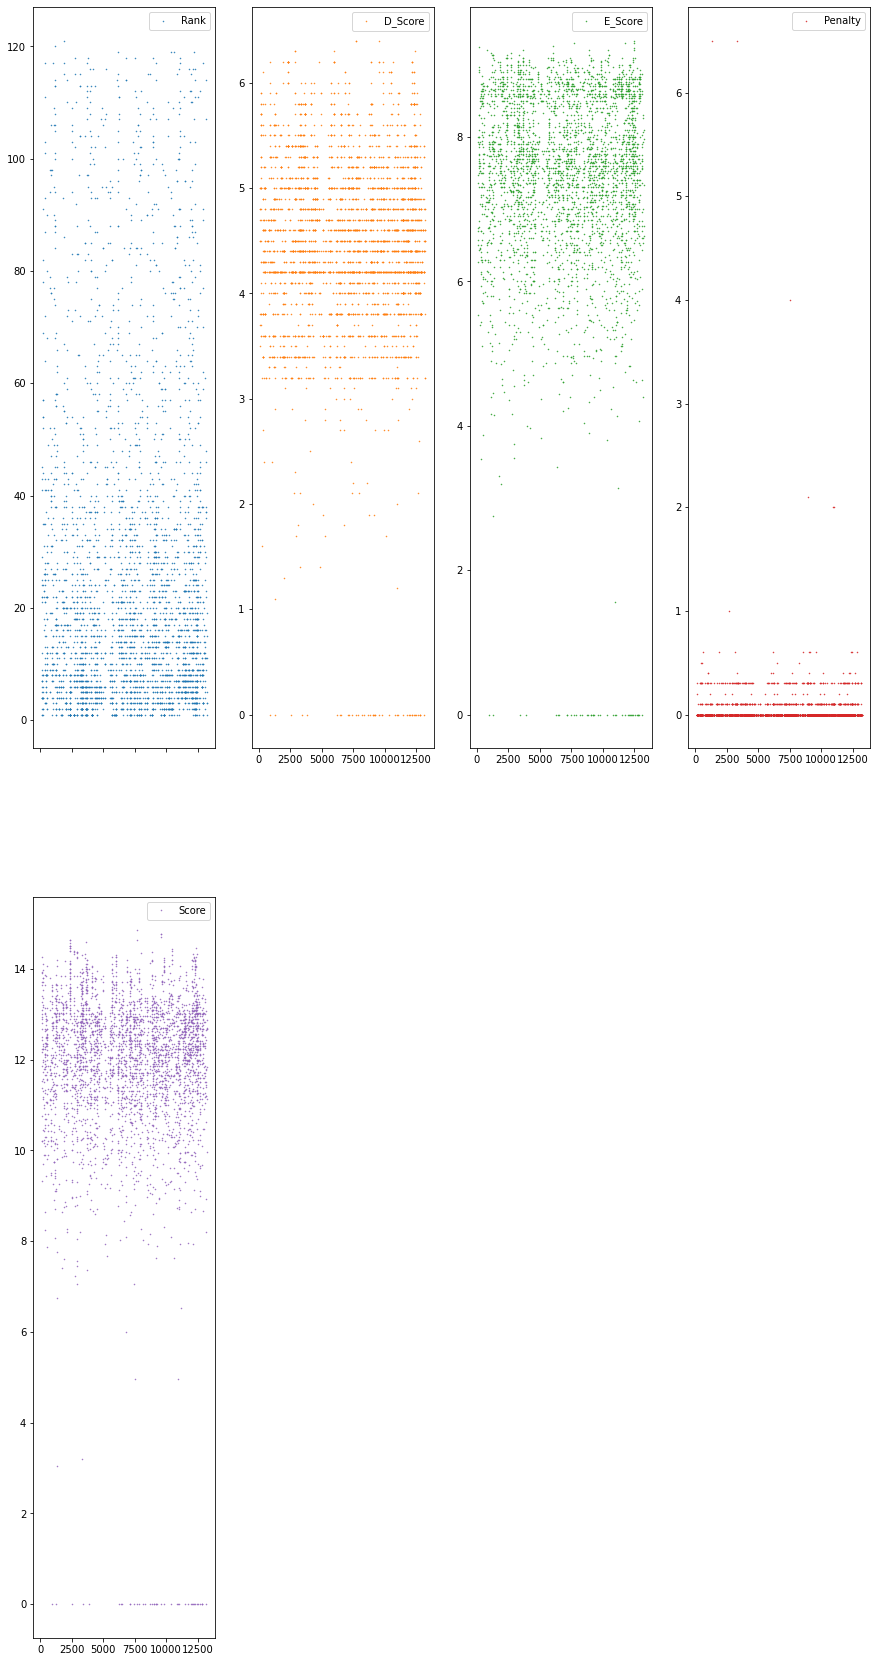

In [32]:
women.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);


In [33]:
women = women[women['D_Score'] != 0.0]

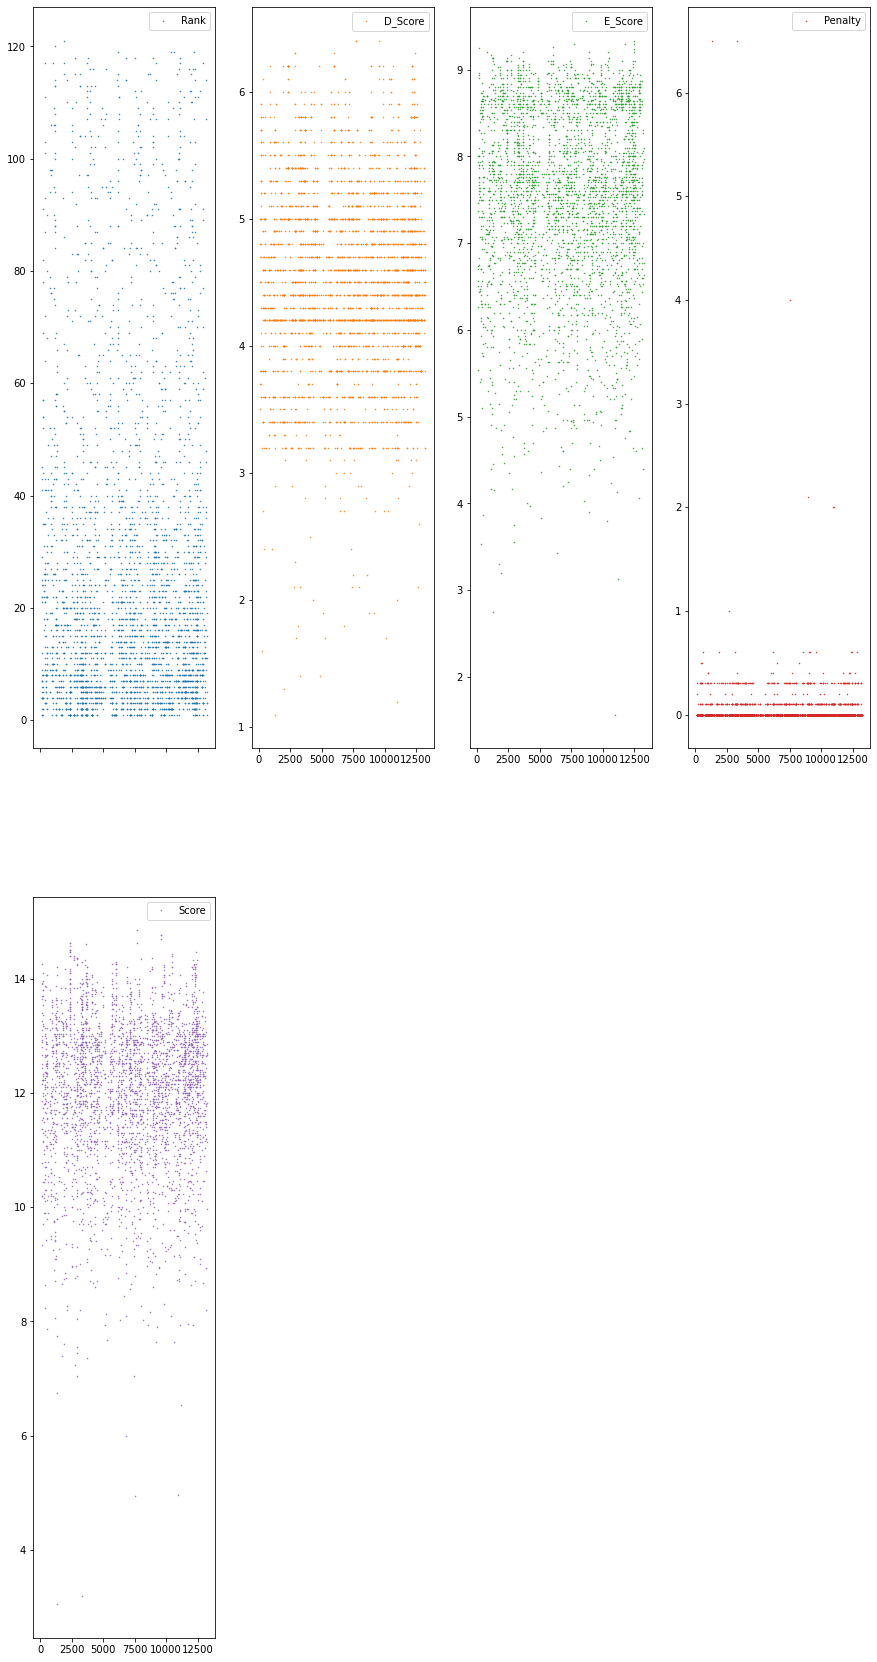

In [34]:
women.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);


In [35]:
women.to_csv('cleaned22to23women_september.csv', index=False)

In [36]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5420 entries, 0 to 13247
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       5420 non-null   object        
 1   Country      5420 non-null   object        
 2   Date         5420 non-null   datetime64[ns]
 3   Competition  5420 non-null   object        
 4   Round        5420 non-null   object        
 5   Location     5420 non-null   object        
 6   Apparatus    5420 non-null   object        
 7   Rank         5420 non-null   float64       
 8   D_Score      5420 non-null   float64       
 9   E_Score      5420 non-null   float64       
 10  Penalty      5420 non-null   float64       
 11  Score        5420 non-null   float64       
 12  Name         5420 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 592.8+ KB


In [37]:
mens.nunique()

Gender           1
Country         80
Date            14
Competition     13
Round            4
Location        13
Apparatus       10
Rank           131
D_Score         53
E_Score        230
Penalty         14
Score          334
Name           574
dtype: int64

In [38]:
mens["Apparatus"].value_counts()

Apparatus
PH      922
FX      872
HB      852
SR      839
PB      830
VT1     632
VT2     322
VT_1     67
VT_2     67
VT       17
Name: count, dtype: int64

In [41]:
# Define the values to be replaced and their replacements
replace_dict = {'VT1': 'VT', 'VT2': 'VT', 'VT_1': 'VT', 'VT_2': 'VT'}

# Use .replace() with the defined dictionary
mens['Apparatus'] = mens['Apparatus'].replace(replace_dict)

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_98704/4108955190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mens['Apparatus'] = mens['Apparatus'].replace(replace_dict)


In [42]:
mens["Apparatus"].value_counts()

Apparatus
VT    1105
PH     922
FX     872
HB     852
SR     839
PB     830
Name: count, dtype: int64

In [43]:
# Define the values to be replaced and their replacements
replace_dict = {'RG': 'SR'}

# Use .replace() with the defined dictionary
mens['Apparatus'] = mens['Apparatus'].replace(replace_dict)


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_98704/2347578299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mens['Apparatus'] = mens['Apparatus'].replace(replace_dict)


In [44]:
mens = mens.drop(columns=["Gender"])

In [45]:
mens.columns

Index(['Country', 'Date', 'Competition', 'Round', 'Location', 'Apparatus',
       'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score', 'Name'],
      dtype='object')

In [46]:
mens = mens[['Name', 'Country', 'Date', 'Competition', 'Round', 'Location', 'Apparatus',
       'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']]

In [49]:

mens["Round"].value_counts()

Round
qual         4254
final         678
AAfinal       344
TeamFinal     144
Name: count, dtype: int64

In [50]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5420 entries, 0 to 13247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         5420 non-null   object        
 1   Country      5420 non-null   object        
 2   Date         5420 non-null   datetime64[ns]
 3   Competition  5420 non-null   object        
 4   Round        5420 non-null   object        
 5   Location     5420 non-null   object        
 6   Apparatus    5420 non-null   object        
 7   Rank         5420 non-null   float64       
 8   D_Score      5420 non-null   float64       
 9   E_Score      5420 non-null   float64       
 10  Penalty      5420 non-null   float64       
 11  Score        5420 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 550.5+ KB


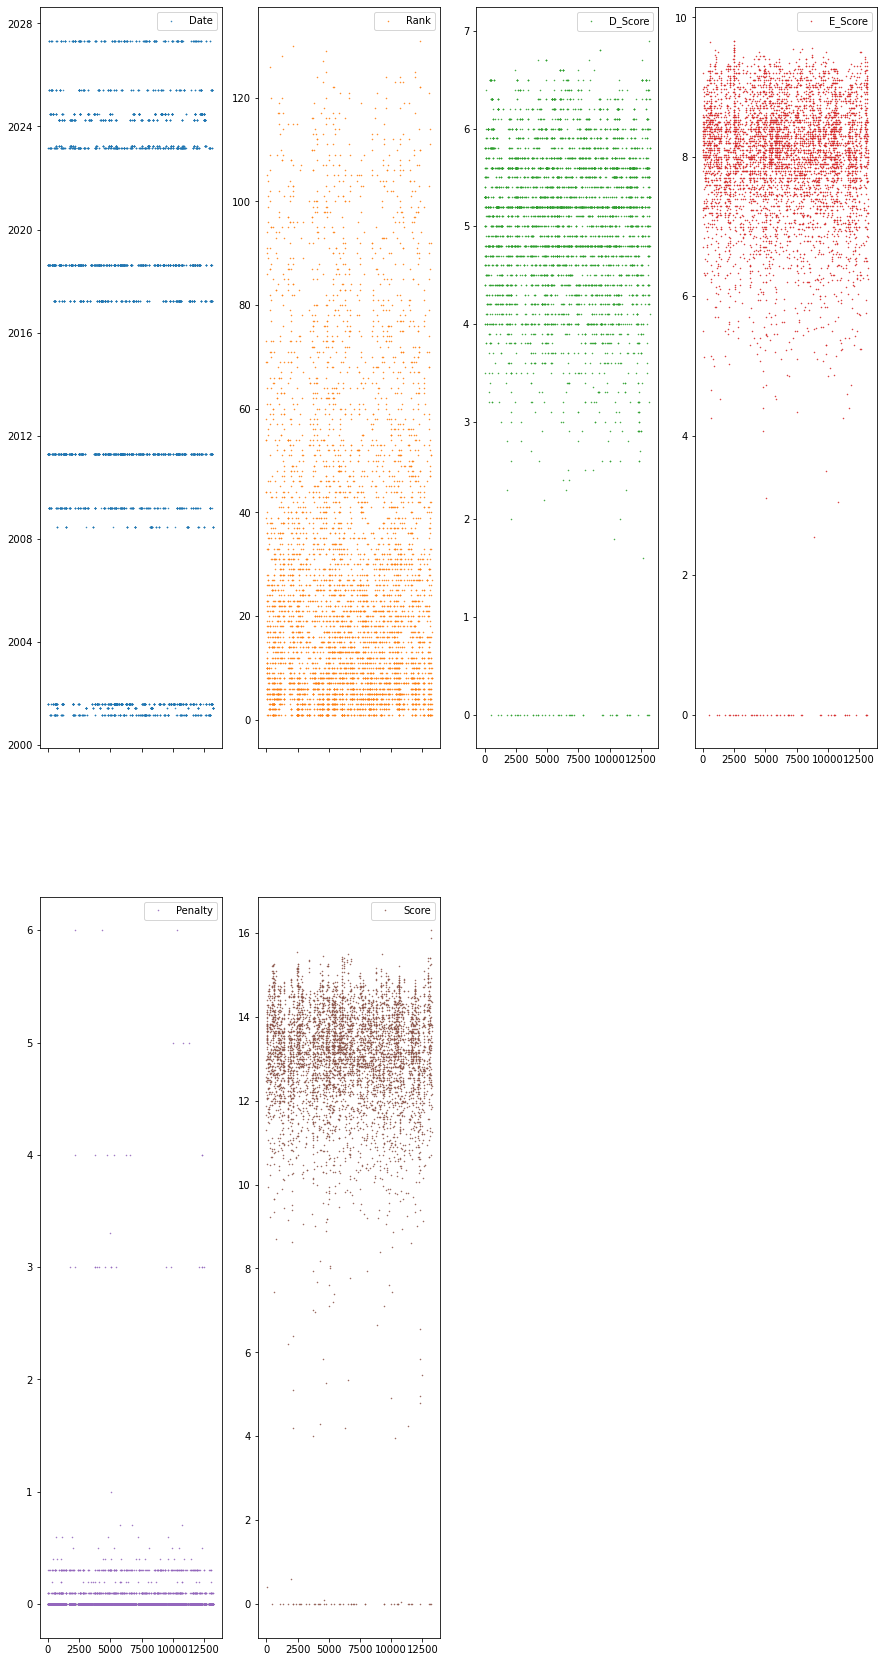

In [51]:
mens.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [52]:
mens = mens[mens['D_Score'] != 0.0]

In [53]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5373 entries, 0 to 13247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         5373 non-null   object        
 1   Country      5373 non-null   object        
 2   Date         5373 non-null   datetime64[ns]
 3   Competition  5373 non-null   object        
 4   Round        5373 non-null   object        
 5   Location     5373 non-null   object        
 6   Apparatus    5373 non-null   object        
 7   Rank         5373 non-null   float64       
 8   D_Score      5373 non-null   float64       
 9   E_Score      5373 non-null   float64       
 10  Penalty      5373 non-null   float64       
 11  Score        5373 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 545.7+ KB


In [54]:
# mens.to_csv('cleaned22to23mens_September.csv', index=False)